# Timeline-Based DFGs

### Import Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import of the original PM4Py 
#import pm4py 

# Relative import of PM4Py when working within this project
import sys
from pathlib import Path

# App directory
project_root = Path.cwd().parent  # Adjust this if necessary
pm4py_path = project_root / "pm4py"
#sys.path.append(str(project_root/"pm4py"))
sys.path.insert(0, str(pm4py_path.parent))
import pm4py

In [3]:
path_data = "data/running_example.xes"
log = pm4py.read_xes(path_data)
print(f" Type of the file that is read : {type(log)}")
print(f" Length of the file that is read : {len(log)}")

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

 Type of the file that is read : <class 'pandas.core.frame.DataFrame'>
 Length of the file that is read : 42


In [4]:
log.head()

,concept:name,org:resource,time:timestamp,Activity,Resource,Costs,case:concept:name
0,register request,Pete,2010-12-30 14:32:00+00:00,register request,Pete,50,3
1,examine casually,Mike,2010-12-30 15:06:00+00:00,examine casually,Mike,400,3
2,check ticket,Ellen,2010-12-30 16:34:00+00:00,check ticket,Ellen,100,3
3,decide,Sara,2011-01-06 09:18:00+00:00,decide,Sara,200,3
4,reinitiate request,Sara,2011-01-06 12:18:00+00:00,reinitiate request,Sara,200,3


In [5]:
start_activities = pm4py.get_start_activities(log)
end_activities = pm4py.get_end_activities(log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'register request': 6}
End activities: {'pay compensation': 3, 'reject request': 3}


In [6]:
dfg, start_activities, end_activities = pm4py.discover_dfg_typed(log) 
for item, key in dfg.items():
    print(item, key)

('check ticket', 'decide') 6
('check ticket', 'examine casually') 2
('check ticket', 'examine thoroughly') 1
('decide', 'pay compensation') 3
('decide', 'reinitiate request') 3
('decide', 'reject request') 3
('examine casually', 'check ticket') 4
('examine casually', 'decide') 2
('examine thoroughly', 'check ticket') 2
('examine thoroughly', 'decide') 1
('register request', 'check ticket') 2
('register request', 'examine casually') 3
('register request', 'examine thoroughly') 1
('reinitiate request', 'check ticket') 1
('reinitiate request', 'examine casually') 1
('reinitiate request', 'examine thoroughly') 1


## Pre-Processing Mechnaisms

Pre-process the log with none, one, or both of the following mechanisms.
- DAFSA Algorithm (Layout Strategy 2)
- Time Rule (Layout Strategy 3)
- DAFSA + Time Rule (Layout Strategy 4)

Note that these pre-processing mechanisms are less suitable for high-variation event logs. 

In [7]:
from pm4py.algo.discovery.dfg.variants import timelinelogprocessing as dft

In [8]:
# DAFSA (LS2)
log_dafsa = dft.dafsaDFG(log)

In [9]:
# Time Rule (LS3)
log_timerules = dft.timeruleDFG(log)

In [10]:
# Hybrid = DAFSA + Time Rule (LS4)
log_hybrid = dft.timeruleDFG(log_dafsa)

## Visualising a Timeline-Based DFG

**Traditional DFG**

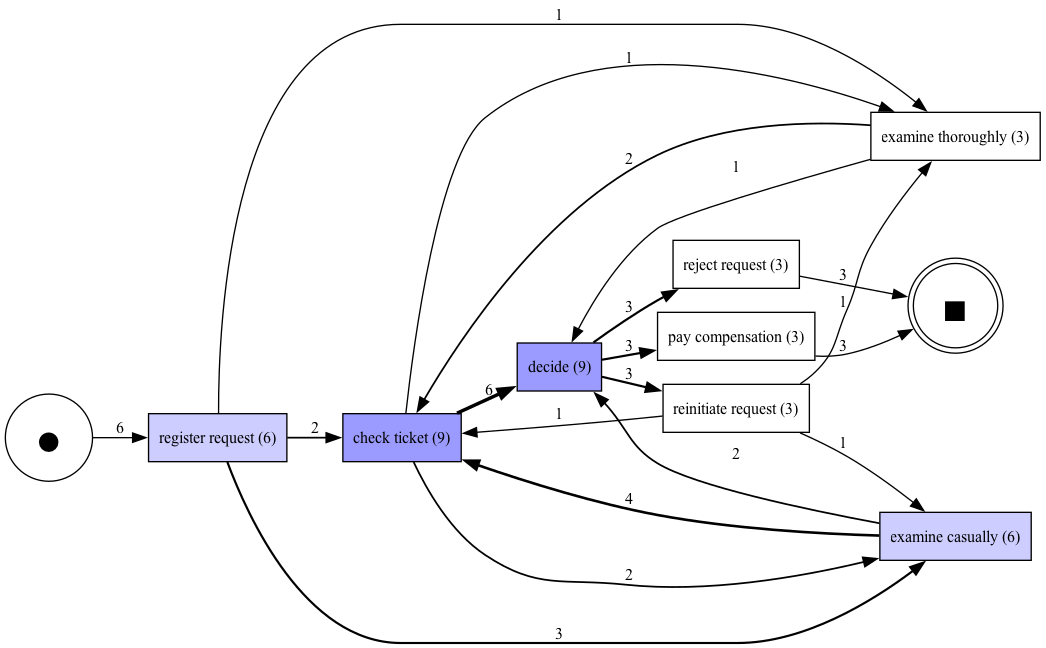

In [11]:
dfg, start_activities, end_activities = pm4py.discover_dfg_typed(log) 
pm4py.view_dfg(dfg,start_activities, end_activities)

**Timeline-Based DFG**

{'register request': Timedelta('0 days 00:00:00'), 'examine thoroughly': Timedelta('3 days 07:06:20'), 'check ticket': Timedelta('3 days 12:23:02'), 'decide': Timedelta('6 days 02:56:18'), 'reject request': Timedelta('10 days 19:19:20'), 'examine casually': Timedelta('2 days 05:46:00'), 'pay compensation': Timedelta('11 days 13:50:20'), 'reinitiate request': Timedelta('8 days 07:38:30')}


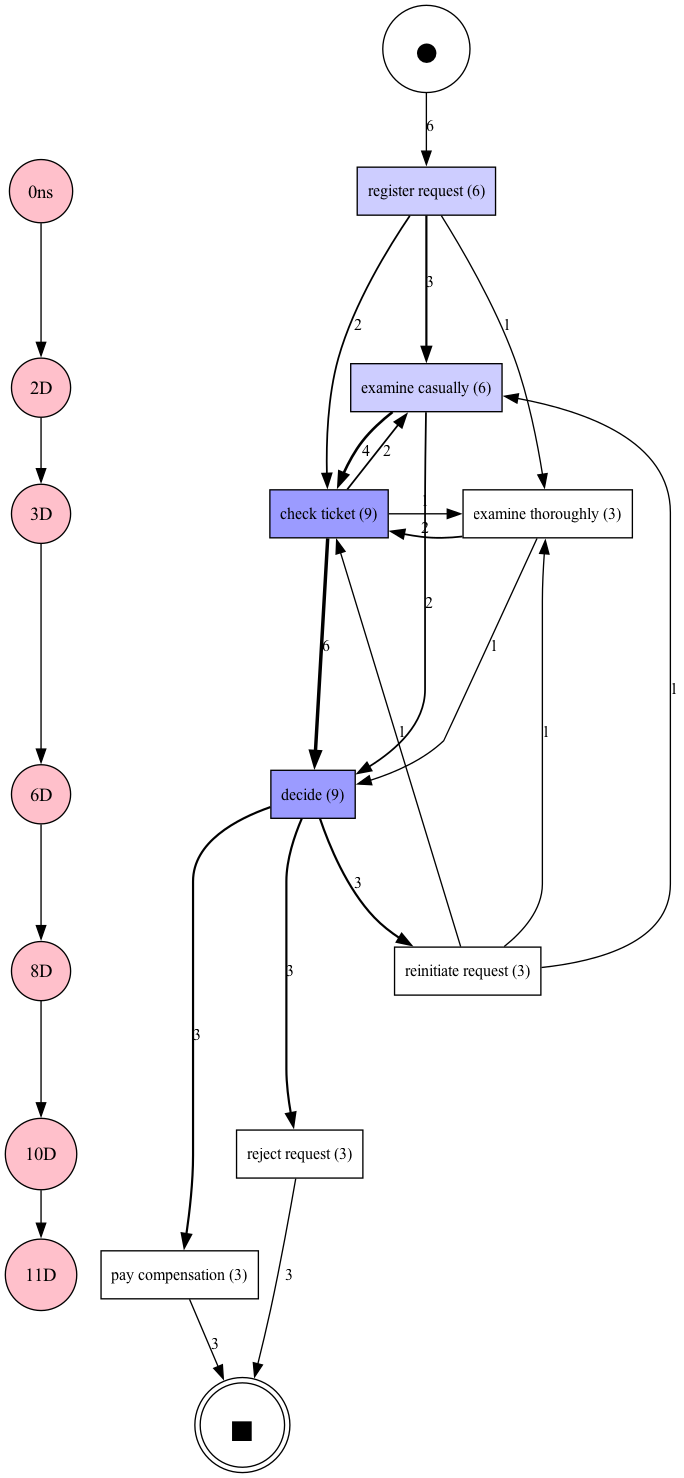

In [12]:
from pm4py.algo.discovery.dfg.variants import clean_time
from pm4py.visualization.dfg.variants import timeline as timeline_gviz_generator
from pm4py.visualization.dfg import visualizer as dfg_visualizer
# discover DFG model 
dfg, start_act, end_act = pm4py.discover_dfg_typed(log) # change log to account for some pre-processing mechanism (e.g., log_dafsa)
# calculate times for timeline
dfg_time = clean_time.apply(log) # change log to account for some pre-processing mechanism (e.g., log_dafsa)
print(dfg_time)
# align DFG with timeline
gviz = timeline_gviz_generator.apply(dfg, dfg_time, parameters={"format": "png", "start_activities": start_act,
                                                                    "end_activities": end_act})
# visualize the DFG
dfg_visualizer.view(gviz)

## Adapt Time Calculations

### Mean Time (default)

{'register request': Timedelta('0 days 00:00:00'), 'examine thoroughly': Timedelta('3 days 07:06:20'), 'check ticket': Timedelta('3 days 12:23:02'), 'decide': Timedelta('6 days 02:56:18'), 'reject request': Timedelta('10 days 19:19:20'), 'examine casually': Timedelta('2 days 05:46:00'), 'pay compensation': Timedelta('11 days 13:50:20'), 'reinitiate request': Timedelta('8 days 07:38:30')}


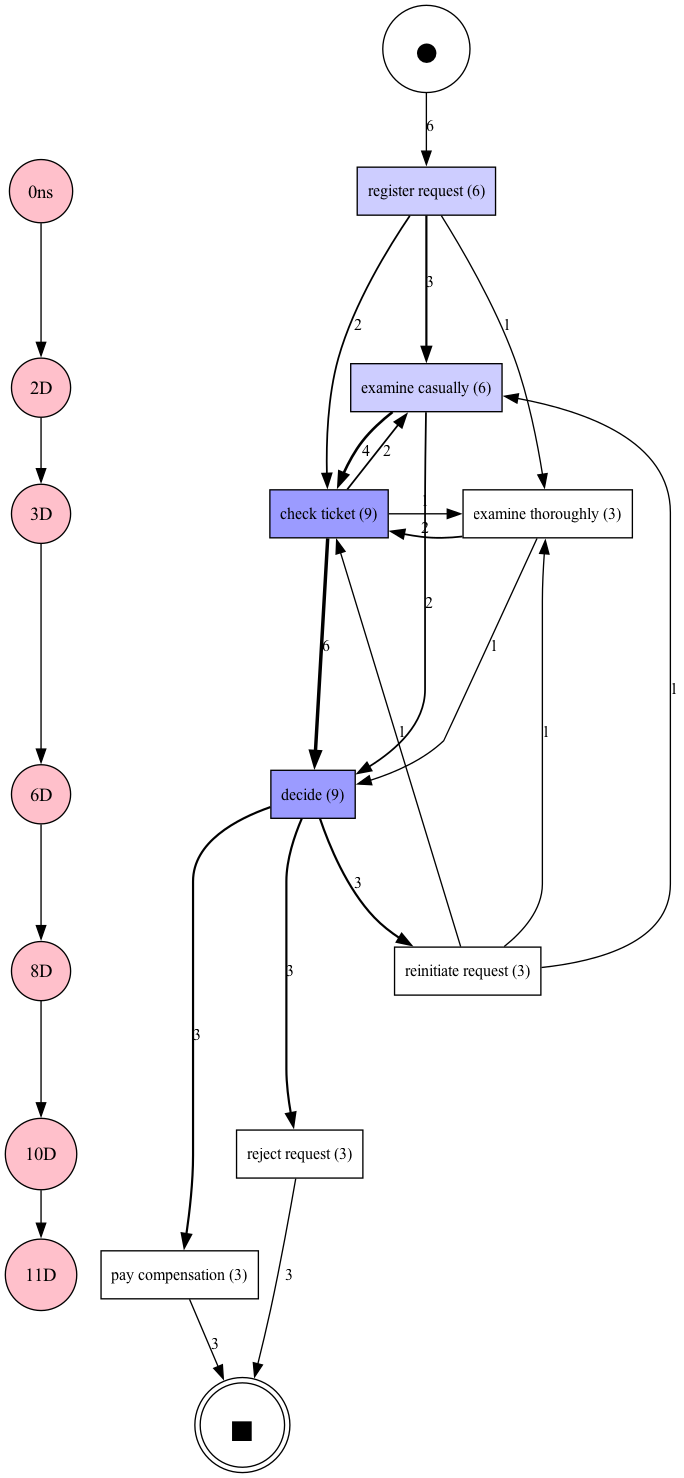

In [13]:
from pm4py.algo.discovery.dfg.variants import clean_time
from pm4py.visualization.dfg.variants import timeline as timeline_gviz_generator
from pm4py.visualization.dfg import visualizer as dfg_visualizer
dfg, start_act, end_act = pm4py.discover_dfg_typed(log)
dfg_time = clean_time.apply(log)
print(dfg_time)
gviz = timeline_gviz_generator.apply(dfg, dfg_time, parameters={
    "format": "png", "start_activities": start_act, "end_activities": end_act})
dfg_visualizer.view(gviz)

### Median Time

{'register request': Timedelta('0 days 00:00:00'), 'examine thoroughly': Timedelta('1 days 23:41:00'), 'check ticket': Timedelta('2 days 18:28:15'), 'decide': Timedelta('6 days 12:03:00'), 'reject request': Timedelta('8 days 03:22:00'), 'examine casually': Timedelta('0 days 01:54:00'), 'pay compensation': Timedelta('9 days 20:45:00'), 'reinitiate request': Timedelta('8 days 07:38:30')}


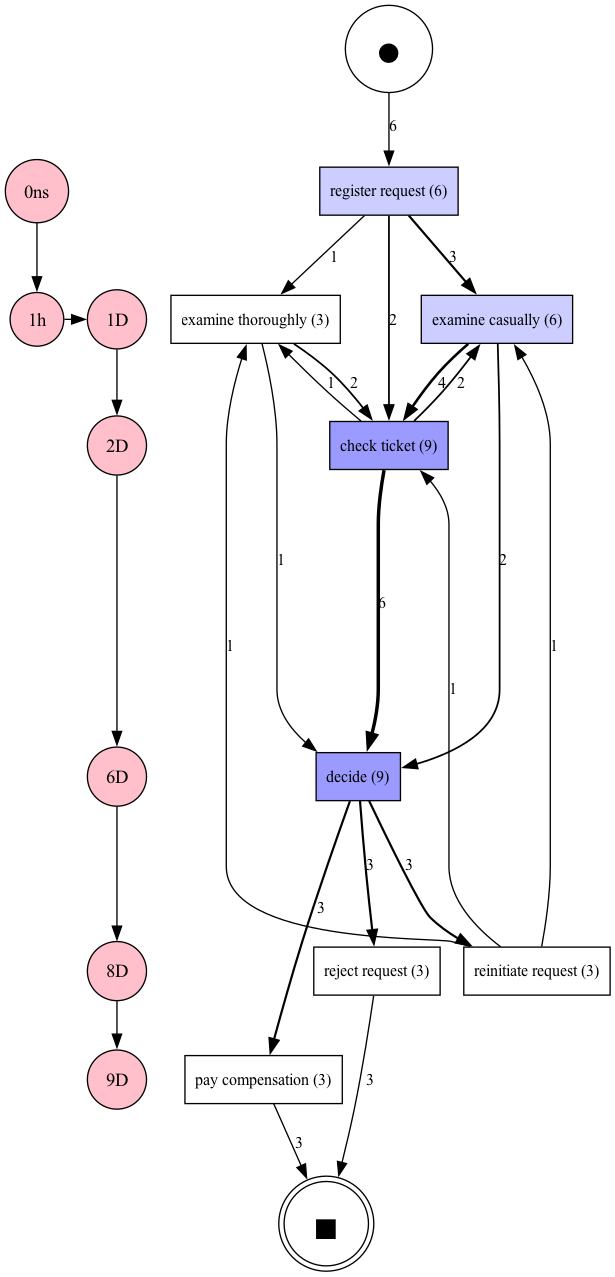

In [14]:
dfg, start_act, end_act = pm4py.discover_dfg_typed(log)
dfg_time = clean_time.apply(log, parameters={"aggregation": "median"}) # change parameters to "median"
print(dfg_time)
gviz = timeline_gviz_generator.apply(dfg, dfg_time, parameters={"format": "png", "start_activities": start_act,
                                                                    "end_activities": end_act})
dfg_visualizer.view(gviz)

### Min Time

{'register request': Timedelta('0 days 00:00:00'), 'examine thoroughly': Timedelta('0 days 23:04:00'), 'check ticket': Timedelta('0 days 00:40:00'), 'decide': Timedelta('1 days 01:50:00'), 'reject request': Timedelta('6 days 00:42:00'), 'examine casually': Timedelta('0 days 00:34:00'), 'pay compensation': Timedelta('9 days 00:33:00'), 'reinitiate request': Timedelta('6 days 21:46:00')}


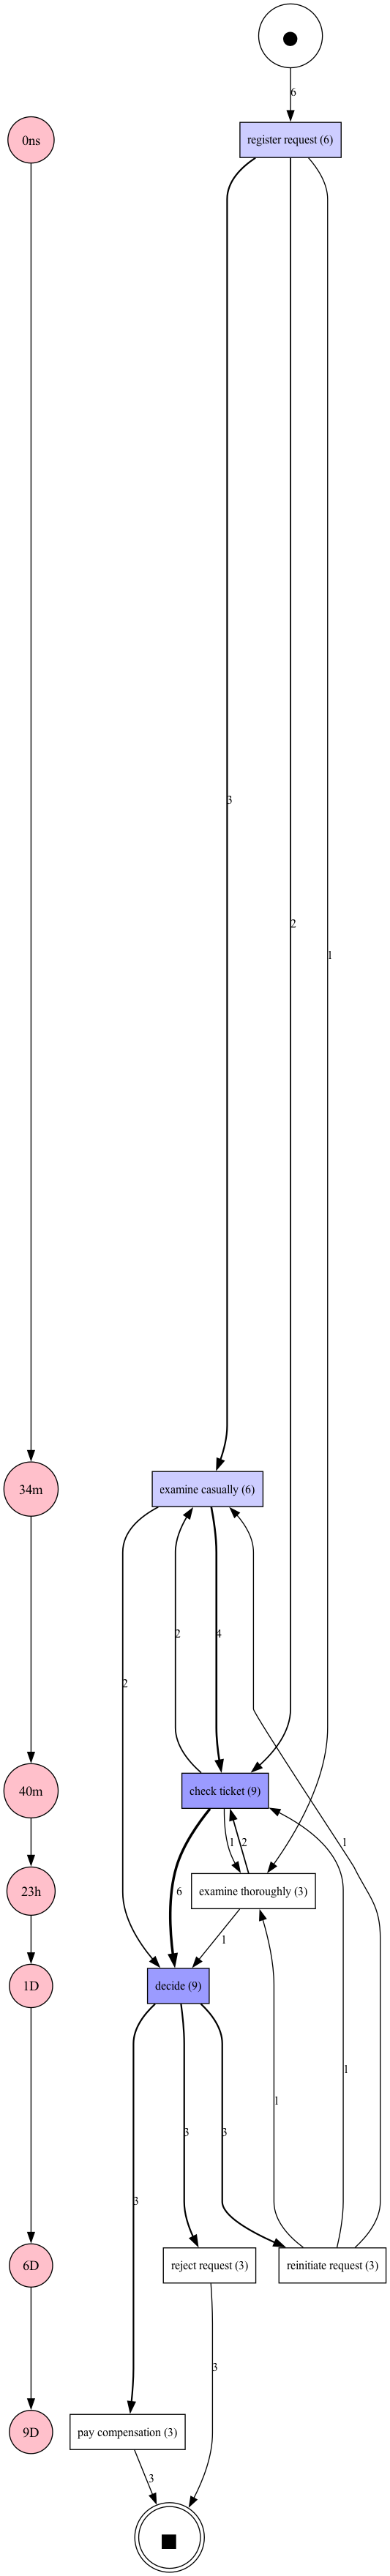

In [15]:
dfg, start_act, end_act = pm4py.discover_dfg_typed(log)
dfg_time = clean_time.apply(log, parameters={"aggregation": "min"}) # change parameters to "min"
print(dfg_time)
gviz = timeline_gviz_generator.apply(dfg, dfg_time, parameters={"format": "png", "start_activities": start_act,
                                                                    "end_activities": end_act})
dfg_visualizer.view(gviz)

### Max Time

In [16]:
dfg, start_act, end_act = pm4py.discover_dfg_typed(log)
dfg_time = clean_time.apply(log, parameters={"aggregation": "max"}) # change parameters to "max"
print(dfg_time)
gviz = timeline_gviz_generator.apply(dfg, dfg_time, parameters={"format": "png", "start_activities": start_act,
                                                                    "end_activities": end_act})
#dfg_visualizer.view(gviz)

{'register request': Timedelta('0 days 00:00:00'), 'examine thoroughly': Timedelta('6 days 22:34:00'), 'check ticket': Timedelta('8 days 11:27:40'), 'decide': Timedelta('11 days 11:37:20'), 'reject request': Timedelta('18 days 05:54:00'), 'examine casually': Timedelta('8 days 18:42:00'), 'pay compensation': Timedelta('15 days 20:13:00'), 'reinitiate request': Timedelta('9 days 17:31:00')}


### Special Cases: Cross-Case Aggregation vs. Loop Handling
Above, we have demonstrated different ways to aggregate the occurence time of activities *accross* cases.
We may be interested in controling the occurence of several events that stem from the same activity *within* a given case.
The most straightforward approach here is to proceed analogously, by taking either the maximum, minimum, average, or median time (note that the default aggregation, i.e., the one used in the examples above, is the average):

{'register request': Timedelta('0 days 00:00:00'), 'examine thoroughly': Timedelta('3 days 07:06:20'), 'check ticket': Timedelta('1 days 17:16:00'), 'decide': Timedelta('4 days 15:41:20'), 'reject request': Timedelta('10 days 19:19:20'), 'examine casually': Timedelta('0 days 07:24:00'), 'pay compensation': Timedelta('11 days 13:50:20'), 'reinitiate request': Timedelta('6 days 02:31:00')}


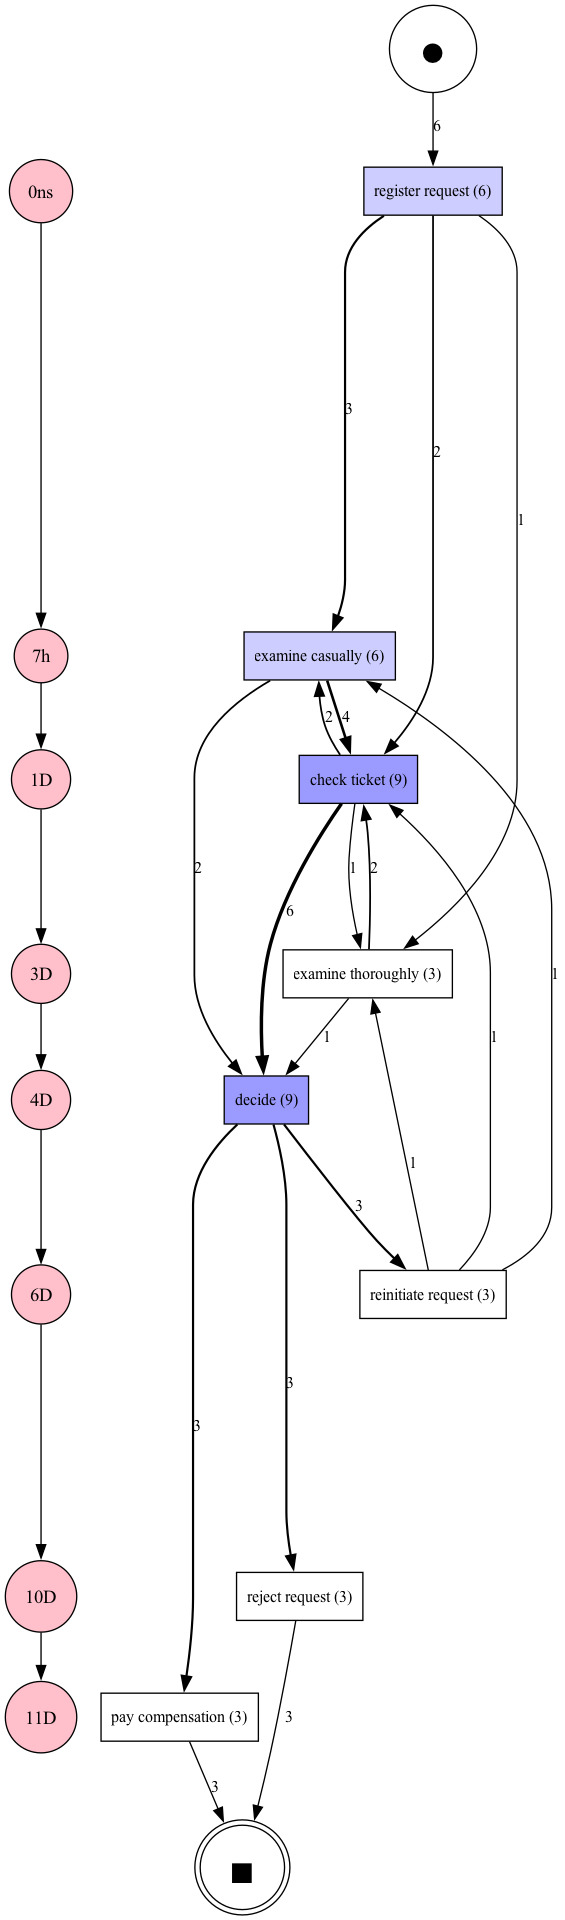

In [17]:
dfg, start_act, end_act = pm4py.discover_dfg_typed(log)
dfg_time = clean_time.apply(log, parameters={"aggregation": "avg", "loop_handling": "min"})
print(dfg_time)
gviz = timeline_gviz_generator.apply(dfg, dfg_time, parameters={"format": "png", "start_activities": start_act,
                                                                    "end_activities": end_act})
dfg_visualizer.view(gviz)

{'register request': Timedelta('0 days 00:00:00'), 'examine thoroughly': Timedelta('3 days 07:06:20'), 'check ticket': Timedelta('5 days 08:29:30'), 'decide': Timedelta('7 days 07:44:50'), 'reject request': Timedelta('10 days 19:19:20'), 'examine casually': Timedelta('3 days 19:06:30'), 'pay compensation': Timedelta('11 days 13:50:20'), 'reinitiate request': Timedelta('10 days 12:46:00')}


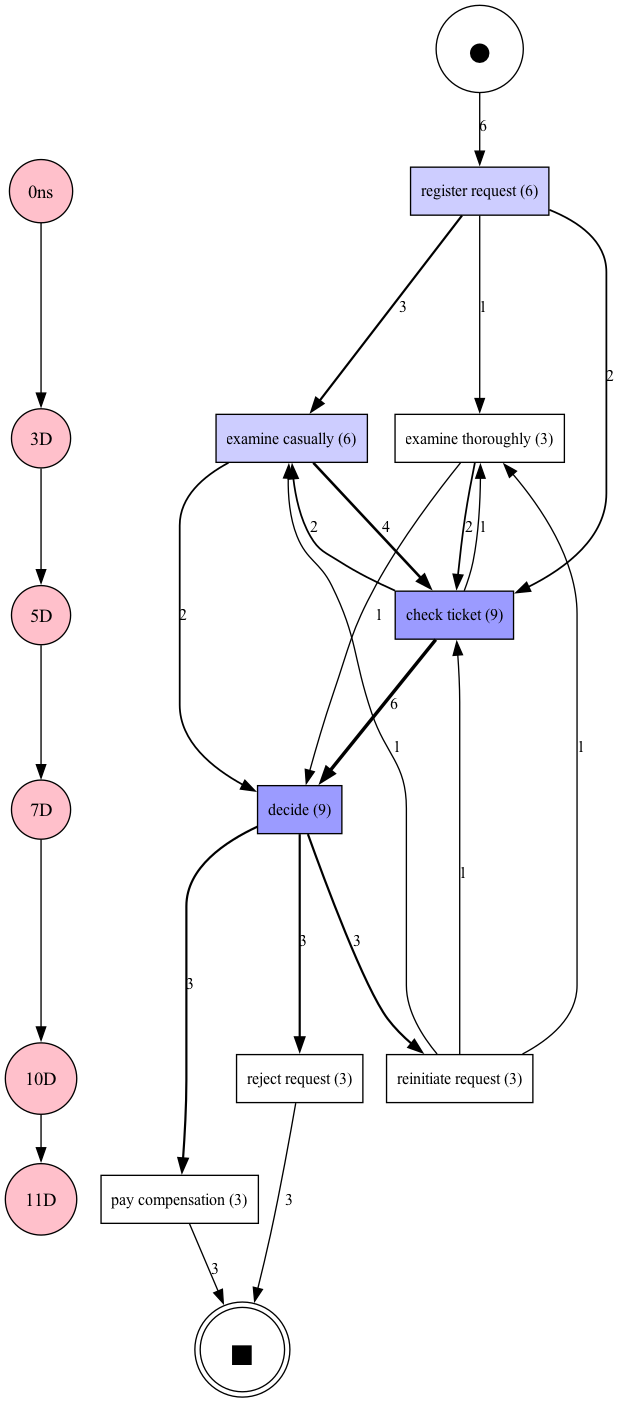

In [18]:
dfg, start_act, end_act = pm4py.discover_dfg_typed(log)
dfg_time = clean_time.apply(log, parameters={"aggregation": "avg", "loop_handling": "max"})
print(dfg_time)
gviz = timeline_gviz_generator.apply(dfg, dfg_time, parameters={"format": "png", "start_activities": start_act,
                                                                    "end_activities": end_act})
dfg_visualizer.view(gviz)

## Adapt Layout Size

### Timeline Distance Mechanism

Change the timeline scale from a semi-logarithm one to a strict one-step ranking

{'register request': Timedelta('0 days 00:00:00'), 'examine thoroughly': Timedelta('3 days 07:06:20'), 'check ticket': Timedelta('3 days 12:23:02'), 'decide': Timedelta('6 days 02:56:18'), 'reject request': Timedelta('10 days 19:19:20'), 'examine casually': Timedelta('2 days 05:46:00'), 'pay compensation': Timedelta('11 days 13:50:20'), 'reinitiate request': Timedelta('8 days 07:38:30')}


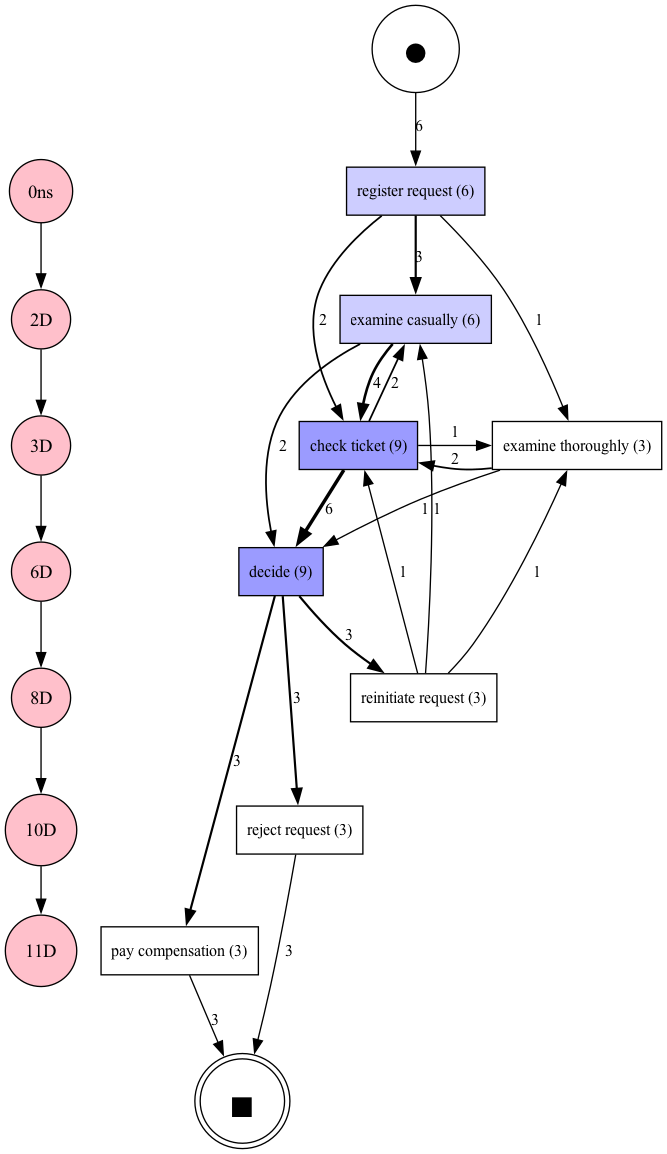

In [19]:
dfg, start_act, end_act = pm4py.discover_dfg_typed(log)
dfg_time = clean_time.apply(log)
print(dfg_time)
gviz = timeline_gviz_generator.apply(dfg, dfg_time, parameters={
    "format": "png", "start_activities": start_act, "end_activities": end_act}, 
    minlen_mechanism="equal") # add parameter "minlen_mechanism="equal"" to change the time node lengths to a strict one-step ranking
dfg_visualizer.view(gviz)

### Time-Folding Mechanism

{'pay compensation': Timedelta('11 days 13:50:20'), 'reject request': Timedelta('11 days 13:50:20'), 'reinitiate request': Timedelta('11 days 13:50:20'), 'decide': Timedelta('11 days 13:50:20'), 'check ticket': Timedelta('3 days 12:23:02'), 'examine thoroughly': Timedelta('3 days 12:23:02'), 'examine casually': Timedelta('3 days 12:23:02'), 'register request': Timedelta('3 days 12:23:02')}


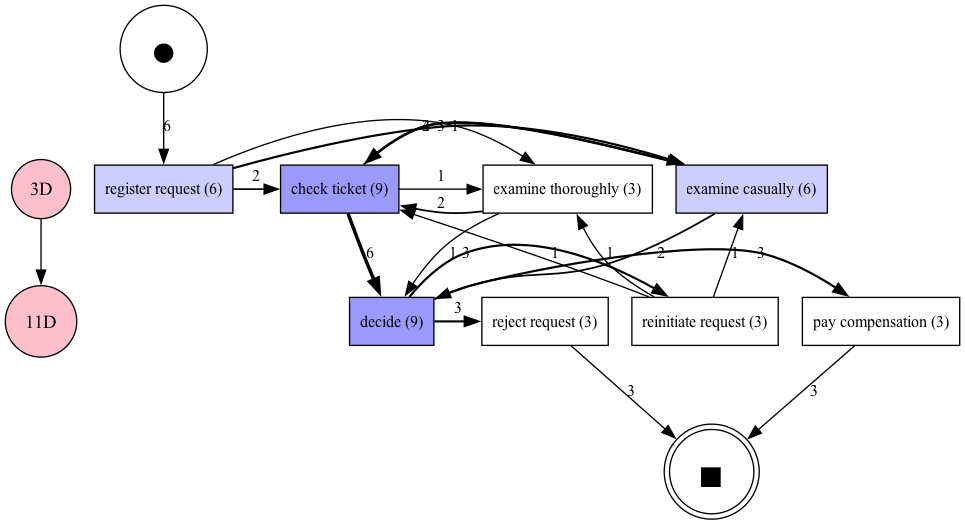

In [20]:
dfg, start_act, end_act = pm4py.discover_dfg_typed(log)
dfg_time = clean_time.apply(log, reduction_to_abs=2) # reduce the amount of time nodes to an absolute number (e.g., 2)
#dfg_time = clean_time.apply(log, reduction_to_perc=.5) # reduce the amount of time nodes to a certain percentage (e.g., 50%)
print(dfg_time)
gviz = timeline_gviz_generator.apply(dfg, dfg_time, parameters={
    "format": "png", "start_activities": start_act, "end_activities": end_act}, 
    minlen_mechanism="equal") # add parameter "minlen_mechanism="equal"" to change the time node lengths to a strict one-step ranking
dfg_visualizer.view(gviz)

# Evaluation of a Timeline-Based DFG

### Synthetic Test Logs

In [22]:
import pandas as pd
data_twoinstance = {"concept:name":['A', 'B', 'A', 'B', 'C', #slow
                                     'A', 'B', 'C'], #fast
               "time:timestamp":[
                   pd.Timestamp(year=2017, month=1, day=1, hour=0), # A1
                   pd.Timestamp(year=2017, month=1, day=1, hour=1), # B1
                   pd.Timestamp(year=2017, month=1, day=2, hour=0), # A1
                   pd.Timestamp(year=2017, month=1, day=2, hour=1), # B1
                   pd.Timestamp(year=2017, month=1, day=2, hour=6), # C1
                   pd.Timestamp(year=2017, month=1, day=2, hour=0), # A2
                   pd.Timestamp(year=2017, month=1, day=2, hour=4), # B2
                   pd.Timestamp(year=2017, month=1, day=2, hour=6)],# C2
                   "case:concept:name": ['1', '1', '1', '1', '1', '2', '2', '2']}
log_twoinstance = pd.DataFrame.from_dict(data_twoinstance)

In [23]:
# additional changes to the log

# filter log, e.g., focus on a set of variants
#log_twoinstance = dft.simplifyLog(log_twoinstance, lifecycle_activities=False, filter_variants_per = 0.005).copy()

# add relative timestamps
log_twoinstance = dft.relativeTimestamps(log_twoinstance).copy()

## Quantiative Comparison of Layout Strategies (1-4)

### Evaluation Script

In [24]:
from pm4py.algo.evaluation.timeline import timelineevaluation as eva

In [25]:
eva.evaluationScript(folder_path_import = 'evaluation/import/', # input data (only XES files)
                     folder_path_export='evaluation/export/', # evaluation results here
                     standard_DFG = True, filter_variants_per=0.1) # further parameters to change the size of the logs

== Evaluation starts ==

== Evaluation ends == 


### Additional Graphs

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

**No. edges vs. no. misalignments**

The relationship between the number of edges and the number of misalignments

4538
1463


/Users/christofferrubensson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/christofferrubensson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/christofferrubensson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/christofferrubensson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

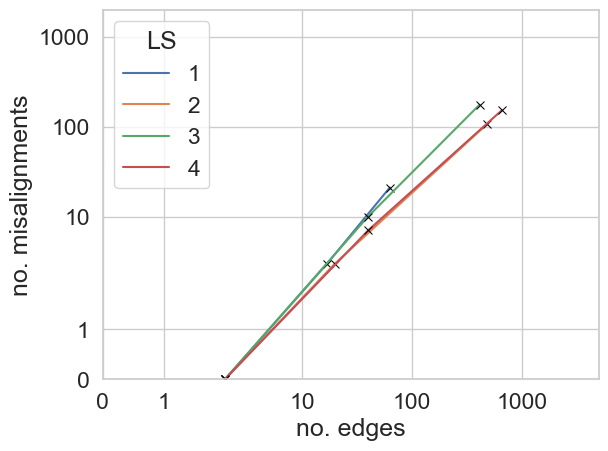

In [27]:
data = {"no. edges":[16, 18, 21, 21, 
                        45, 139, 158, 264, 
                        106, 1209, 4096, 4538,
                        
                        
                        6, 7, 6, 8, 
                        16, 43, 49, 60, 
                        48, 341, 426, 829, 
                        
                        11, 11, 11, 11, 
                        155, 185, 198, 200, 
                        911, 2829, 2972, 3086, 
                        
                        2, 2, 2, 2, 
                        17, 20, 40, 40, 
                        63, 484, 412, 657, 
                       ], 
               "no. misalignments":[4, 2, 4, 1, 
                            14, 30, 62, 62, 
                            43, 319, 1463, 1346, 

                            2, 1, 2, 0, 
                            5, 7, 13, 3, 
                            19, 77, 135, 147, 
                                       
                                       
                            4, 4, 4, 4, 
                            59, 65, 72, 66, 
                            445, 707, 1210, 782, 
                                       
                            0, 0, 0, 0, 
                            3, 3, 10, 7, 
                            21, 107, 175, 152, 
                                      ],
               "misalignments/edges":[0.25, 0.11, 0.19, 0.05, 
                            0.31, 0.22, 0.39, 0.23, 
                            0.41, 0.26, 0.36, 0.30, 

                            0.33, 0.14, 0.33, 0, 
                            0.31, 0.16, 0.27, 0.05, 
                            0.40, 0.23, 0.32, 0.18, 
                                       
                                       
                            0.36, 0.36, 0.36, 0.36, 
                            0.38, 0.35, 0.36, 0.33, 
                            0.49, 0.25, 0.41, 0.25, 
                                       
                            0, 0, 0, 0, 
                            0.18, 0.15, 0.25, 0.18, 
                            0.33, 0.22, 0.42, 0.23, 
                                      ],
              "LS": ['1', '2', '3', '4', 
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4', 
                     
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4', 
                     
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4',
                     
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4',
                    ], 
       "log": ['bpic12', 'bpic12', 'bpic12', 'bpic12',
               'bpic12', 'bpic12', 'bpic12', 'bpic12', 
               'bpic12', 'bpic12', 'bpic12', 'bpic12',
                   'bpic13', 'bpic13', 'bpic13', 'bpic13', 
                     'bpic13', 'bpic13', 'bpic13', 'bpic13', 
                     'bpic13', 'bpic13', 'bpic13', 'bpic13', 
               
               'bpic15', 'bpic15', 'bpic15', 'bpic15',
               'bpic15', 'bpic15', 'bpic15', 'bpic15',
               'bpic15', 'bpic15', 'bpic15', 'bpic15',
               
                     'sepsis', 'sepsis', 'sepsis', 'sepsis', 
                     'sepsis', 'sepsis', 'sepsis', 'sepsis', 
                     'sepsis', 'sepsis', 'sepsis', 'sepsis',  
              ]}

data = pd.DataFrame.from_dict(data)
# x-y max min
x_max = data["no. edges"].max()
y_max = data["no. misalignments"].max()

# visualization
data = data[data['log']=='sepsis']
sns.lineplot(data=data, 
             x="no. edges", y="no. misalignments", 
             #x="no. edges (norm)", y="misalignments (norm)", 
             marker='x', markerfacecolor='black', markeredgecolor='black', 
             hue="LS", err_style=None)
# additional changes
plt.xscale('symlog') # x axis log scale
plt.yscale('symlog') # y axis scale
plt.xticks([0, 1, 10, 100, 1000], ['0', '1', '10', '100', '1000']) # manual ticks
plt.yticks([0, 1, 10, 100, 1000], ['0', '1', '10', '100', '1000']) # manual ticks
plt.xlim([0, 5000])  # x-axis range
plt.ylim([0, 2000])   # y-axis range
plt.rcParams['axes.xmargin'] = 1
plt.rcParams['axes.ymargin'] = 1
print(x_max)
print(y_max)

**No. variants vs. misalignments-edge-ratio**

The relationship between the number of variants and misalignments-edges-ratio.

437
0.49


/var/folders/g6/049p1mz12jq5k0tmdypn8g7w0000gn/T/ipykernel_6875/248998035.py:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data[data['log']=='sepsis'],
/Users/christofferrubensson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/christofferrubensson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/christofferrubensson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

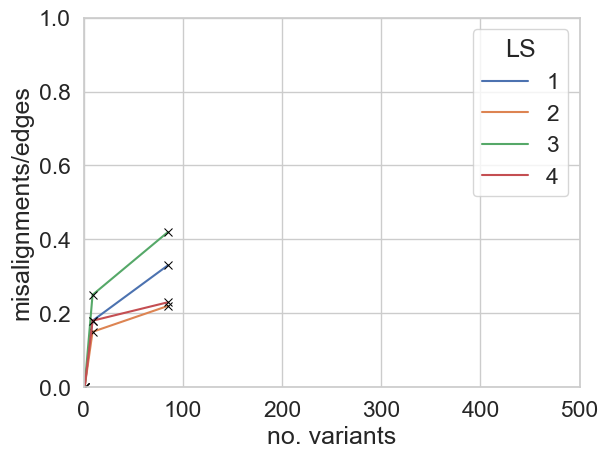

In [28]:
data = {"no. variants":[5, 5, 5, 5, 
                        44, 44, 44, 44, 
                        437, 437, 437, 437,
                        
                        3, 3, 3, 3, 
                        23, 23, 23, 23, 
                        228, 228, 228, 228, 
                        
                        1, 1, 1, 1, 
                        9, 9, 9, 9, 
                        83, 83, 83, 83, 
                        
                        1, 1, 1, 1, 
                        9, 9, 9, 9, 
                        85, 85, 85, 85, 
                       ], 
               "misalignments/edges":[0.25, 0.11, 0.19, 0.05, 
                            0.31, 0.22, 0.39, 0.23, 
                            0.41, 0.26, 0.36, 0.30, 

                            0.33, 0.14, 0.33, 0, 
                            0.31, 0.16, 0.27, 0.05, 
                            0.40, 0.23, 0.32, 0.18, 
                                       
                                       
                            0.36, 0.36, 0.36, 0.36, 
                            0.38, 0.35, 0.36, 0.33, 
                            0.49, 0.25, 0.41, 0.25, 
                                       
                            0, 0, 0, 0, 
                            0.18, 0.15, 0.25, 0.18, 
                            0.33, 0.22, 0.42, 0.23, 
                                      ],
              "LS": ['1', '2', '3', '4', 
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4', 
                     
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4', 
                     
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4',
                     
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4',
                    ], 
       "log": ['bpic12', 'bpic12', 'bpic12', 'bpic12',
               'bpic12', 'bpic12', 'bpic12', 'bpic12', 
               'bpic12', 'bpic12', 'bpic12', 'bpic12',
                   'bpic13', 'bpic13', 'bpic13', 'bpic13', 
                     'bpic13', 'bpic13', 'bpic13', 'bpic13', 
                     'bpic13', 'bpic13', 'bpic13', 'bpic13', 
               
               'bpic15', 'bpic15', 'bpic15', 'bpic15',
               'bpic15', 'bpic15', 'bpic15', 'bpic15',
               'bpic15', 'bpic15', 'bpic15', 'bpic15',
               
                     'sepsis', 'sepsis', 'sepsis', 'sepsis', 
                     'sepsis', 'sepsis', 'sepsis', 'sepsis', 
                     'sepsis', 'sepsis', 'sepsis', 'sepsis',  
              ]}
data = pd.DataFrame.from_dict(data)
# x-y max min
x_max = data["no. variants"].max()
y_max = data["misalignments/edges"].max()

# visualization
sns.lineplot(data=data[data['log']=='sepsis'], 
             marker='x', markerfacecolor='black', markeredgecolor='black',
             x="no. variants", y="misalignments/edges", 
             hue="LS", ci=None)

# additional changes
#plt.xscale('symlog') # x axis log scale
#plt.yscale('symlog') # y axis scale
#plt.xticks([0, 1, 10, 100, 1000], ['0', '1', '10', '100', '1000']) # manual ticks
#plt.yticks([0, 1, 10, 100, 1000], ['0', '1', '10', '100', '1000']) # manual ticks
plt.xlim([0, 500])  # x-axis range
plt.ylim([0, 1])   # y-axis range
plt.rcParams['axes.xmargin'] = 1
plt.rcParams['axes.ymargin'] = 1
print(x_max)
print(y_max)

**No. activities vs. no. nodes**

The relationship between the number of activities in the log and the number
of nodes in the model

89
2976


/var/folders/g6/049p1mz12jq5k0tmdypn8g7w0000gn/T/ipykernel_6875/227077740.py:69: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data[data['log']=='sepsis'],
/Users/christofferrubensson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/christofferrubensson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/christofferrubensson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

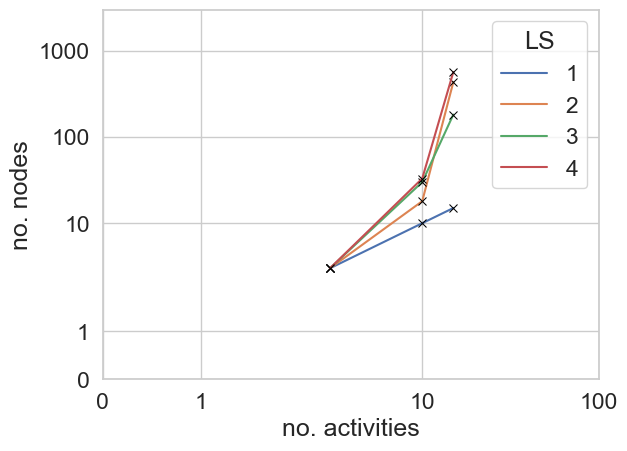

In [29]:
data = {"no. activities":[10, 10, 10, 10, 
                          23, 23, 23, 23, 
                          35, 35, 35, 35,
                                      
                                      5, 5, 5, 5, 
                                    8, 8, 8, 8, 
                                    12, 12, 12, 12, 
                          
                                    12, 12, 12, 12, 
                                    74, 74, 74, 74, 
                                    89, 89, 89, 89, 
                          
                                    3, 3, 3, 3, 
                                    10, 10, 10, 10, 
                                    15, 15, 15, 15, 
                         ], 
               "no. nodes":[10, 17, 17, 20, 
                           23, 102, 91, 185, 
                            35, 831, 2396, 2976, 
                            
                            5, 7, 5, 8, 
                            8, 25, 22, 43, 
                            12, 152, 170, 563, 
                            
                            12, 12, 12, 12, 
                            74, 185, 148, 192, 
                            89, 2772, 1578, 2943, 
                            
                            3, 3, 3, 3, 
                            10, 18, 30, 33, 
                            15, 433, 182, 567, 
                           ],
              "LS": ['1', '2', '3', '4', 
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4', 
                     
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4', 
                     
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4',
                     
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4', 
                     '1', '2', '3', '4',
                    ], 
       "log": ['bpic12', 'bpic12', 'bpic12', 'bpic12',
               'bpic12', 'bpic12', 'bpic12', 'bpic12', 
               'bpic12', 'bpic12', 'bpic12', 'bpic12',
                   'bpic13', 'bpic13', 'bpic13', 'bpic13', 
                     'bpic13', 'bpic13', 'bpic13', 'bpic13', 
                     'bpic13', 'bpic13', 'bpic13', 'bpic13', 
               
               'bpic15', 'bpic15', 'bpic15', 'bpic15',
               'bpic15', 'bpic15', 'bpic15', 'bpic15',
               'bpic15', 'bpic15', 'bpic15', 'bpic15',
               
                     'sepsis', 'sepsis', 'sepsis', 'sepsis', 
                     'sepsis', 'sepsis', 'sepsis', 'sepsis', 
                     'sepsis', 'sepsis', 'sepsis', 'sepsis',  
              ]}
data = pd.DataFrame.from_dict(data)
# x-y max min
x_max = data["no. activities"].max()
y_max = data["no. nodes"].max()
# visualization
sns.lineplot(data=data[data['log']=='sepsis'], 
             x="no. activities", y="no. nodes", 
             marker='x', markerfacecolor='black', markeredgecolor='black',
             hue="LS", ci=None)
# additional changes
plt.xscale('symlog') # x axis log scale
plt.yscale('symlog') # y axis scale
plt.xticks([0, 1, 10, 100, 1000], ['0', '1', '10', '100', '1000']) # manual ticks
plt.yticks([0, 1, 10, 100, 1000], ['0', '1', '10', '100', '1000']) # manual ticks
plt.xlim([0, 100])  # x-axis range
plt.ylim([0, 3000])   # y-axis range
plt.rcParams['axes.xmargin'] = 1
plt.rcParams['axes.ymargin'] = 1
print(x_max)
print(y_max)

## Qualitative Comparison of Layout Strategies and Alternatives

**Performance DFG**

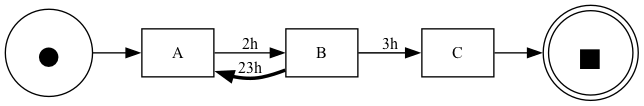

In [30]:
performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(log_twoinstance) # change log to account for some pre-processing mechanism (e.g., log_dafsa
pm4py.view_performance_dfg(performance_dfg,start_activities, end_activities)

**Dotted Chart**

In [31]:
log_twoinstance.columns

Index(['concept:name', 'time:timestamp', 'case:concept:name', 'time:relative',
       'start_timestamp'],
      dtype='object')

In [32]:
# same graph but in plotly
import plotly.express as px

# Choose to create relative timestamps
#df['timestamp'] = pd.to_datetime(df['time:timestamp'])
#df['timestamp'] = df['time:relative']
log_prep = log_twoinstance.sort_values(by='time:timestamp').copy()

# Create a scatter plot for a dotted chart
fig = px.scatter(
    log_prep,
    x='time:timestamp', # choose absolute timestamps here
    #x='time:relative', # choose relative timestamps here
    y='case:concept:name',
    color='concept:name',
    title='Dotted Chart',
    labels={'case:concept:name': 'Case ID', 'concept:name': 'Activity'},
    opacity=0.9,
    #height=300,
    height=700,
)

# Customize layout
fig.update_layout(
    xaxis_title="Time",
    yaxis_title="Cases",
    legend_title="Activities",
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
)

# Visualizate the plot
fig.update_traces(marker=dict(size=10))
fig.show()